
# Session 5-1: Matplotlib 📈

![mpl](../assets/mpl.png)



**Don't forget to start your notebook with a cell containing the import statements you need for the session.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 📚  <b> Practice 1. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="../assets/mpl_prac1.png" alt="prac1" width="600"/>

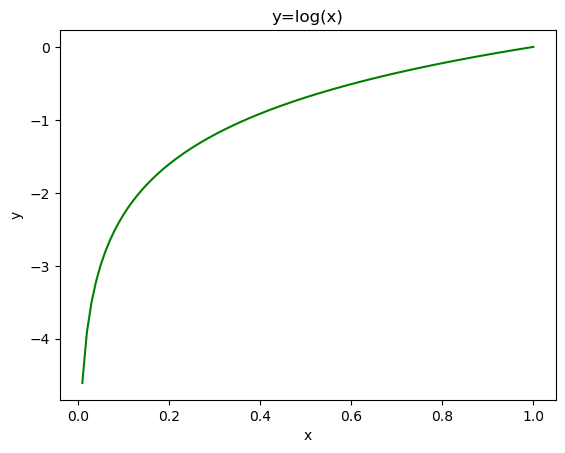

In [10]:
# Plot y=log(x) in green
x = np.linspace(.01, 1, 100)
y = np.log(x)
fig, ax = plt.subplots()
ax.plot(x, y, 'g-')
ax.set_title('y=log(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


## 📚  <b> Practice 2. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="../assets/mpl_prac2.png" alt="prac2" width="600"/>

In [29]:
# Plot a series of three sine waves, with amplitudes 1, 10, and 5, in different colors from 0-10


(1.0, 0.0, 0.0)

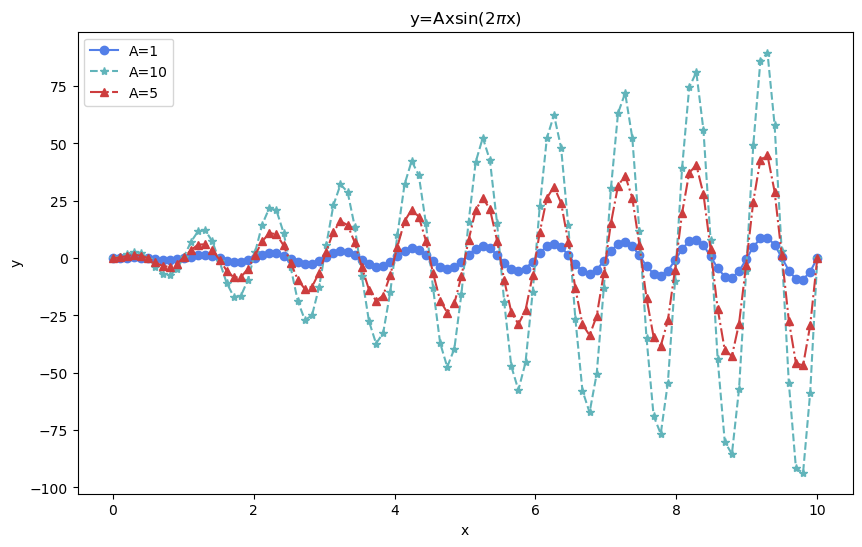

In [40]:
def rgb(r, g, b):
    return (r/255, g/255, b/255)

x = np.linspace(0, 10, 100)
y1 = 1 * x* np.sin(2*np.pi*x)
y2 = 10 * x * np.sin(2*np.pi*x)
y3 = 5 * x * np.sin(2*np.pi*x)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y1, '-', label='A=1', marker='o', color=rgb(83,127,232))
ax.plot(x, y2, '--', label='A=10', marker='*', color=rgb(97,180,186))
ax.plot(x, y3, '-.', label='A=5', marker='^', color=rgb(205,61,62))
# add markers to the plot
ax.set_title('y=Axsin(2$\pi$x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()


## 📚  <b> Practice 3. </b> 

Import the data from `./data/BSRN_data.csv` and plot the temperature and relative humidity over the month of October 2019 at the BSRN station. Be sure to format the timestamps and include axis labels, a title, and a legend, if necessary.



In [2]:
# Import data
bsrn = pd.read_csv('../data/BSRN_GOB_2019-10.csv',index_col=0,parse_dates=True)

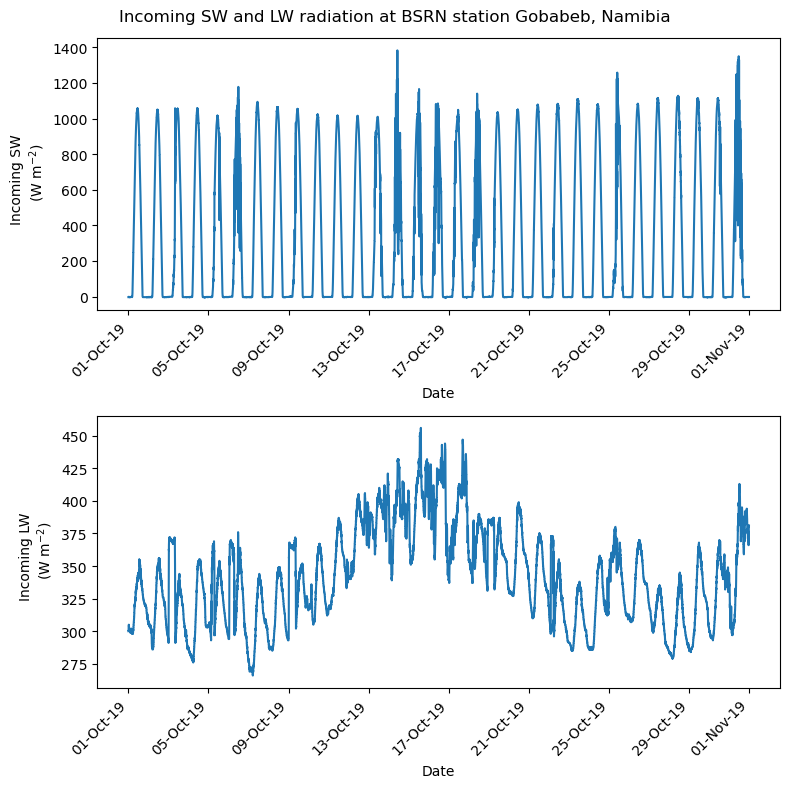

In [3]:

# Initialize empty figure and axes
fig = plt.figure(figsize=(8,8))
# Create two subplots in a 1x2 grid:
# 1. Incoming SW radiation
# 2. Incoming LW radiation
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# Filter data for October 2019:
bsrn = bsrn.loc['2019-10-01':'2019-10-31']
# Plot incoming SW radiation for October 2019:
ax1.plot(bsrn.index,bsrn.SWD_Wm2)
# Plot incoming LW radiation
ax2.plot(bsrn.index,bsrn.LWD_Wm2)
# Label y-axes
ax1.set_ylabel("Incoming SW  \n (W m$^{-2}$)")
ax2.set_ylabel("Incoming LW  \n (W m$^{-2}$)")
# Format timestamps
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
# Format and rotate ticks
plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=10, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=45, fontsize=10, ha='right')
# Label x-axes
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')
# Set figure title
fig.suptitle('Incoming SW and LW radiation at BSRN station Gobabeb, Namibia')
# Show figure
fig.tight_layout()
plt.show()


## 📚 Practice 4.

Saturation vapor pressure, \( $ e^*(T_a) $ \), is the maximum pressure of water vapor that can exist in equilibrium above a flat plane of water at a given temperature. It can be calculated from the Tetens equation:

$$ e^{*}(T_{a}) = a \times exp({\frac{b \cdot T_{a}}{T_{a} + c}}) $$

where $ T_a $ is the air temperature in °C, $ a = 0.611  $ kPa,  $ b = 17.502  $, and  $ c = 240.97 °C  $.

1. Calculate \( $ e^*(T_a) $ \) in kPa for all temperatures in `bsrn`.
1. Plot temperature vs. saturation vapor pressure for the BSRN station. Be sure to format your plot appropriately and include axis labels, a title, and a legend, if necessary.
1. Compare your plot to Figure 3-1 in Campbell and Norman (1998). Do they look more or less the same?


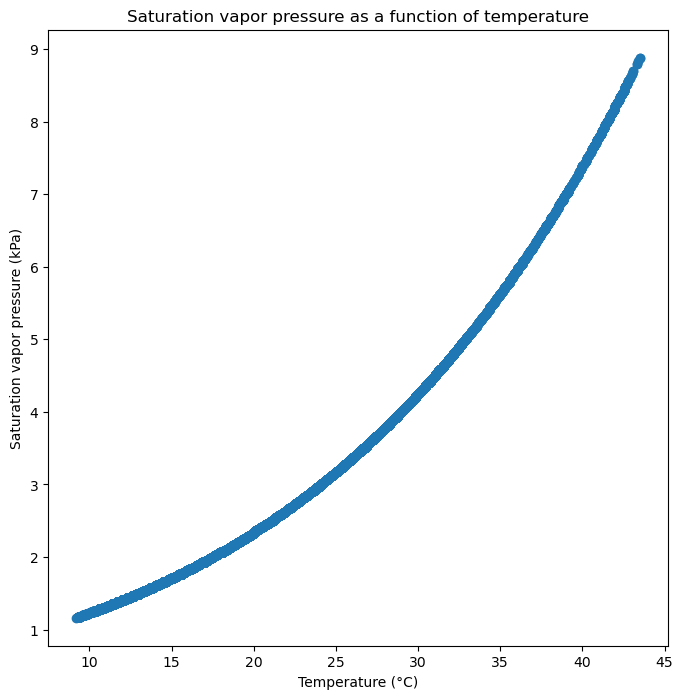

In [4]:

# 1. Calculate saturation vapor pressure in kPa for a T_degC column in bsrn and assign it to a new column 'e_sat_kPa' 
import numpy as np
bsrn['e_sat_kPa'] = 0.611 * np.exp((17.502 * bsrn.T_degC) / (bsrn.T_degC + 240.97))

# 2. Create a scatterplot of temperature versus stauration vapor pressure. Be sure to format the x-axis ticks as dates.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
plt.scatter(bsrn.T_degC,bsrn.e_sat_kPa)
# set xlabel
ax.set_xlabel('Temperature (°C)')
# set ylabel
ax.set_ylabel('Saturation vapor pressure (kPa)')
# set title
ax.set_title('Saturation vapor pressure as a function of temperature')

# show the figure
plt.show()



## 📚  <b> Practice 5. </b> 
The difference between saturation vapor pressure and ambient air pressure is called vapor pressure deficit, $\textit{VPD}$. $\textit{VPD}$ can be calculated from saturation vapor pressure and relative humidity, $h_r$, as follows:
$$ \textit{VPD} \, = \, e^*(T_a) \cdot (1 \, - \, h_r)$$
where $h_r$ is expressed as a fraction.

1. Calculate the vapor pressure deficit for the BSRN data.
1. Calculate the mean hourly $e^*(T_a)$ and $\textit{VPD}$ over the entire month.
1. Plot $e^*(T_a)$ and $\textit{VPD}$ as a function of time of day. (for extra python points, try plotting both variables on one plot using [ax.twinx()](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html))
1. How does relative humidity vary throughout the day? Why?
1. Compare your plot(s) to Figure 3-3 in Campbell and Norman (1998). How do the values of $e^*(T_a)$ and $\textit{VPD}$ for the BSRN station compare to those at constant vapor pressure in Figure 3-3?




Text(0.5, 1.0, 'Hourly means of VPD and saturation vapor pressure')

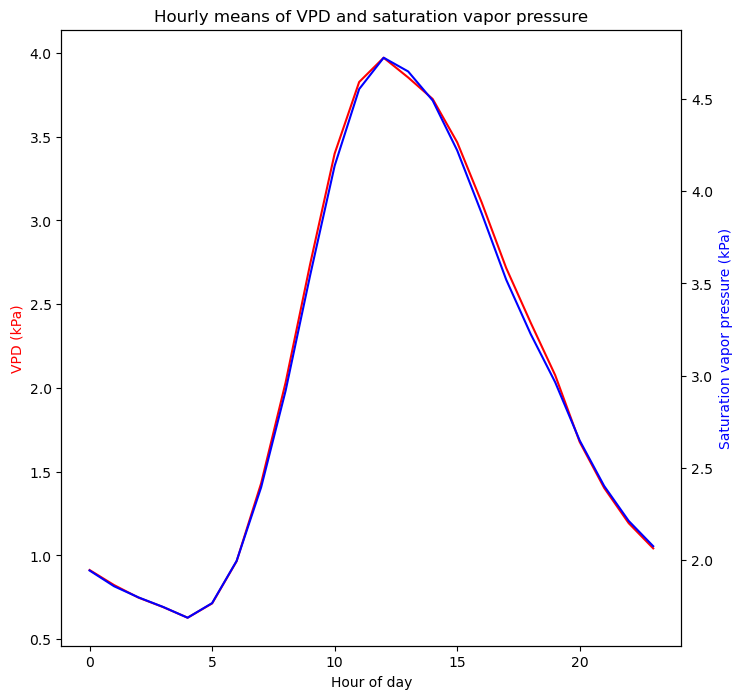

In [5]:
# Calulate VPD in kPa for bsrn data:
bsrn['VPD_kPa'] = bsrn.e_sat_kPa * (1 - bsrn.RH/100)

# For each hour in the day, calculate the monthly means
bsrn_hourly = bsrn.groupby(bsrn.index.hour).mean()

# plot the hourly means of VPD and e_sat_kPa. Use ax.twinx() to plot both variables on the same axes.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
ax.plot(bsrn_hourly.index,bsrn_hourly.VPD_kPa,color='red')
ax2.plot(bsrn_hourly.index,bsrn_hourly.e_sat_kPa,color='blue')
# set xlabel
ax.set_xlabel('Hour of day')
# set ylabel
ax.set_ylabel('VPD (kPa)',color='red')
ax2.set_ylabel('Saturation vapor pressure (kPa)',color='blue')
# set title
ax.set_title('Hourly means of VPD and saturation vapor pressure')
# show the figure




<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>